<a href="https://colab.research.google.com/github/surocham/ca_naruto/blob/main/analise_correspondencia_naruto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🥷 Análise de Correspondência Simples — Mundo Naruto
**Objetivo:** Descobrir a relação entre as aldeias e os estilos de luta dos shinobis, passo a passo.

feito por suami medeiros, deixa um estrelinha pls.

---
## 📦 Passo 1 — Importando as bibliotecas

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

sns.set_style('whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 11,
    'axes.titlesize': 15,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12
})

---
## 📄 Passo 2 — Carregando os dados
Vamos carregar a tabela de contingência do CSV que temos. Ela cruza **aldeias** (linhas) com **estilos de luta** (colunas).

In [35]:
data = pd.read_csv('tabela_contingencia_naruto.csv', index_col=0)
print('Forma da tabela:', data.shape)
data

Forma da tabela: (4, 4)


,Taijutsu,Ninjutsu,Genjutsu,Senjutsu
Aldeia,,,,
Konoha,30,25,15,10
Suna,15,20,25,20
Kiri,10,15,25,35
Ame,20,30,25,15


---
## 🔥 Passo 3 — Visualizando a Tabela de Contingência
Um heatmap para ver os dados brutos de uma forma mais intuitiva. Quanto mais escuro, mais shinobis naquela combinação.

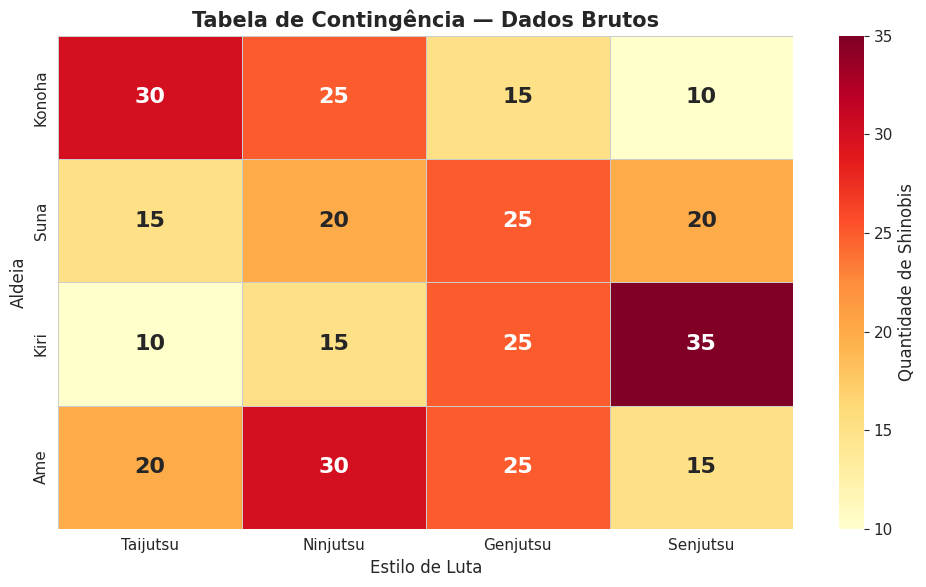

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, fmt='d', cmap='YlOrRd',
            linewidths=0.5, linecolor='#cccccc',
            cbar_kws={'label': 'Quantidade de Shinobis'},
            annot_kws={'size': 16, 'weight': 'bold'})
plt.title('Tabela de Contingência — Dados Brutos')
plt.xlabel('Estilo de Luta')
plt.ylabel('Aldeia')
plt.tight_layout()
plt.show()

---
## 📊 Passo 4 — Calculando os Perfis de Linha e Coluna
- **Perfil de linha:** proporção de cada estilo dentro de cada aldeia (soma 100% por linha)
- **Perfil de coluna:** proporção de cada aldeia dentro de cada estilo (soma 100% por coluna)

O perfil de linha é como o "perfil de combate" de cada aldeia.

In [37]:
# Perfil de linha
row_profile = data.div(data.sum(axis=1), axis=0)
print('PERFIL DE LINHA (proporção por aldeia)\n')
print(row_profile.round(3))
print('\nSoma por linha (deve ser 1.0):', row_profile.sum(axis=1).values)

PERFIL DE LINHA (proporção por aldeia)

        Taijutsu  Ninjutsu  Genjutsu  Senjutsu
Aldeia                                        
Konoha     0.375     0.312     0.188     0.125
Suna       0.188     0.250     0.312     0.250
Kiri       0.118     0.176     0.294     0.412
Ame        0.222     0.333     0.278     0.167

Soma por linha (deve ser 1.0): [1. 1. 1. 1.]


In [38]:
# Perfil de coluna
col_profile = data.div(data.sum(axis=0), axis=1)
print('PERFIL DE COLUNA (proporção por estilo)\n')
print(col_profile.round(3))
print('\nSoma por coluna (deve ser 1.0):', col_profile.sum(axis=0).values)

PERFIL DE COLUNA (proporção por estilo)

        Taijutsu  Ninjutsu  Genjutsu  Senjutsu
Aldeia                                        
Konoha     0.400     0.278     0.167     0.125
Suna       0.200     0.222     0.278     0.250
Kiri       0.133     0.167     0.278     0.438
Ame        0.267     0.333     0.278     0.188

Soma por coluna (deve ser 1.0): [1. 1. 1. 1.]


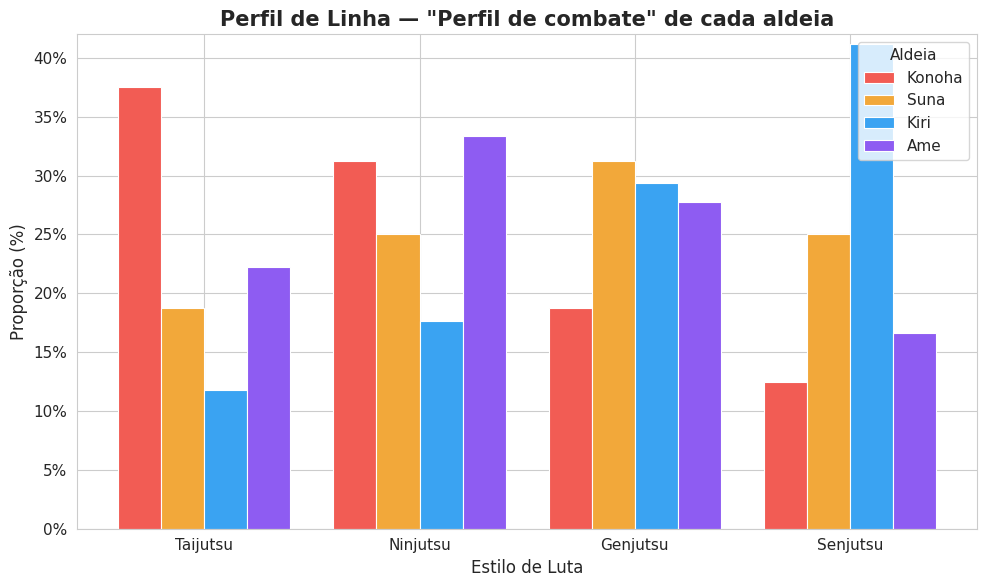

In [39]:
# Visualizando o perfil de linha
COLORS_ALDEIAS = {
    'Konoha': '#F25C54',
    'Suna':   '#F2A83A',
    'Kiri':   '#3AA3F2',
    'Ame':    '#8E5CF2'
}

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(data.columns))
width = 0.2

for idx, aldeia in enumerate(data.index):
    ax.bar(x + idx * width, row_profile.loc[aldeia] * 100,
           width, label=aldeia, color=COLORS_ALDEIAS[aldeia],
           edgecolor='white', linewidth=0.8)

ax.set_title('Perfil de Linha — "Perfil de combate" de cada aldeia')
ax.set_xlabel('Estilo de Luta')
ax.set_ylabel('Proporção (%)')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(data.columns)
ax.legend(title='Aldeia')
ax.set_ylim(0, 42)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v:.0f}%'))
plt.tight_layout()
plt.show()

---
## ⚔️ Passo 5 — Teste Qui-Quadrado
Antes de continuar, precisamos confirmar que existe uma **associação real** entre aldeias e estilos de luta.

- **p < 0,05** → existe associação significativa (não é coincidência)
- **p ≥ 0,05** → não há evidência suficiente de associação

In [40]:
chi2, p_value, dof, expected = chi2_contingency(data)

print('TESTE QUI-QUADRADO')
print(f'Chi-quadrado : {chi2:.4f}')
print(f'P-valor      : {p_value:.4f}')
print(f'Graus de lib.: {dof}')
print()

if p_value < 0.05:
    print('Resultado: p < 0,05 → Existe associação significativa!')
else:
    print('Resultado: p ≥ 0,05 → Não há associação significativa.')

print('\nFREQUÊNCIAS ESPERADAS (se não houvesse associação)\n')
expected_df = pd.DataFrame(expected, index=data.index, columns=data.columns)
print(expected_df.round(2))

TESTE QUI-QUADRADO
Chi-quadrado : 37.4419
P-valor      : 0.0000
Graus de lib.: 9

Resultado: p < 0,05 → Existe associação significativa!

FREQUÊNCIAS ESPERADAS (se não houvesse associação)

        Taijutsu  Ninjutsu  Genjutsu  Senjutsu
Aldeia                                        
Konoha     17.91     21.49     21.49     19.10
Suna       17.91     21.49     21.49     19.10
Kiri       19.03     22.84     22.84     20.30
Ame        20.15     24.18     24.18     21.49


---
## 🔍 Passo 6 — Resíduos Padronizados
Os resíduos medem a diferença entre o que **observamos** e o que **esperaríamos** se não houvesse relação.

- **Valor positivo (azul):** mais do que o esperado → associação forte (é um "Rock Lee" nessa combinação)
- **Valor negativo (vermelho):** menos do que o esperado

Fórmula: `resíduo = (observado − esperado) / √esperado`

In [41]:
n = data.sum().sum()
row_sums = data.sum(axis=1)
col_sums = data.sum(axis=0)

residuals = pd.DataFrame(index=data.index, columns=data.columns, dtype=float)

for i in data.index:
    for j in data.columns:
        expected_ij = (row_sums[i] * col_sums[j]) / n
        residuals.loc[i, j] = (data.loc[i, j] - expected_ij) / np.sqrt(expected_ij)

print('Resíduos Padronizados')
print(residuals.round(3))

Resíduos Padronizados
        Taijutsu  Ninjutsu  Genjutsu  Senjutsu
Aldeia                                        
Konoha     2.857     0.757    -1.400    -2.083
Suna      -0.688    -0.322     0.757     0.205
Kiri      -2.070    -1.640     0.453     3.263
Ame       -0.033     1.184     0.167    -1.400


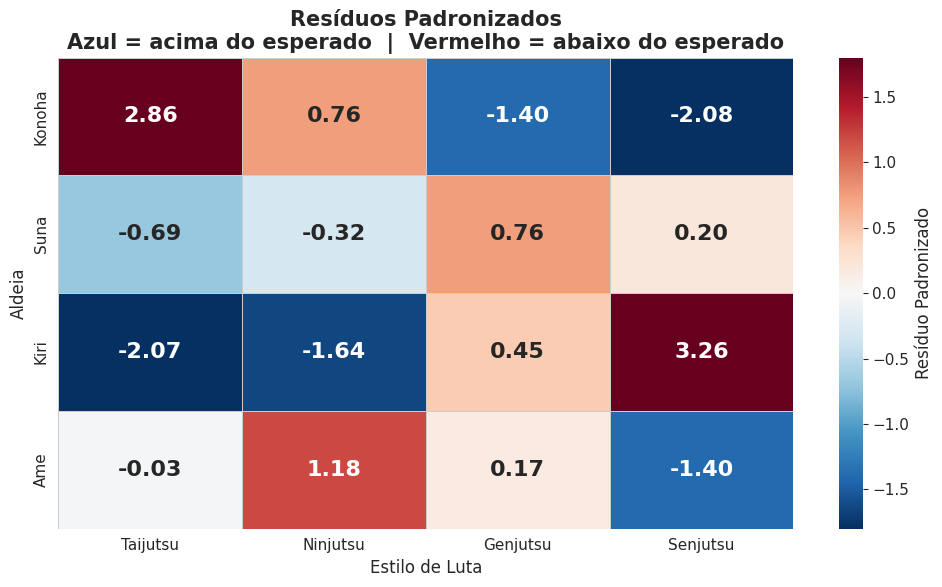

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(residuals, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            linewidths=0.5, linecolor='#cccccc',
            cbar_kws={'label': 'Resíduo Padronizado'},
            annot_kws={'size': 16, 'weight': 'bold'},
            vmin=-1.8, vmax=1.8)
plt.title('Resíduos Padronizados\nAzul = acima do esperado  |  Vermelho = abaixo do esperado')
plt.xlabel('Estilo de Luta')
plt.ylabel('Aldeia')
plt.tight_layout()
plt.show()

---
## 🧪 Passo 7 — Decomposição SVD
A SVD (Singular Value Decomposition) é o coração matemático da CA.

Ela **comprime** toda a informação da tabela em dimensões menores, como usar o Sharingan: foca no que importa e ignora o resto.

Etapas:
1. Normalizar a matriz (converter em proporções)
2. Calcular a matriz de resíduos padronizada pela massa
3. Aplicar SVD para obter as coordenadas

In [43]:
# 1. Normalizar a matriz
P = data.values / n
print('Matriz de Proporções (P)')
print(pd.DataFrame(P, index=data.index, columns=data.columns).round(3))
print(f'\nSoma total (deve ser 1.0): {P.sum():.1f}')

Matriz de Proporções (P)
        Taijutsu  Ninjutsu  Genjutsu  Senjutsu
Aldeia                                        
Konoha     0.090     0.075     0.045     0.030
Suna       0.045     0.060     0.075     0.060
Kiri       0.030     0.045     0.075     0.104
Ame        0.060     0.090     0.075     0.045

Soma total (deve ser 1.0): 1.0


In [44]:
# 2. Calcular massas e matriz Z
row_mass = P.sum(axis=1)  # massa das linhas
col_mass = P.sum(axis=0)  # massa das colunas

print('Massa das linhas (aldeias):')
for aldeia, massa in zip(data.index, row_mass):
    print(f'  {aldeia}: {massa:.3f}')

print('Massa das colunas (estilos):')
for estilo, massa in zip(data.columns, col_mass):
    print(f'  {estilo}: {massa:.3f}')

# Matriz Z (resíduos padronizados pela massa)
Z = (P - np.outer(row_mass, col_mass)) / np.sqrt(np.outer(row_mass, col_mass))
print('Matriz Z (entrada da SVD)')
print(pd.DataFrame(Z, index=data.index, columns=data.columns).round(4))

Massa das linhas (aldeias):
  Konoha: 0.239
  Suna: 0.239
  Kiri: 0.254
  Ame: 0.269
Massa das colunas (estilos):
  Taijutsu: 0.224
  Ninjutsu: 0.269
  Genjutsu: 0.269
  Senjutsu: 0.239
Matriz Z (entrada da SVD)
        Taijutsu  Ninjutsu  Genjutsu  Senjutsu
Aldeia                                        
Konoha    0.1561    0.0413   -0.0765   -0.1138
Suna     -0.0376   -0.0176    0.0413    0.0112
Kiri     -0.1131   -0.0896    0.0247    0.1783
Ame      -0.0018    0.0647    0.0091   -0.0765


In [45]:
# 3. Aplicar SVD
U, s, Vt = np.linalg.svd(Z, full_matrices=False)

print('Valores Singulares(s)')
for i, val in enumerate(s):
    print(f'  s[{i}] = {val:.4f}')

# Coordenadas nas duas primeiras dimensões
row_coords = U[:, :2] * s[:2]
col_coords = Vt.T[:, :2] * s[:2]

# Inércia explicada por dimensão
inertia = s**2
explained_var = inertia / inertia.sum() * 100

print('\nInércia explicada por dimensão')
for i, var in enumerate(explained_var):
    print(f'  Dimensão {i+1}: {var:.2f}%')
print(f'\n  Acumulada (Dim 1 + 2): {explained_var[0] + explained_var[1]:.2f}%')

print('\n Coordenadas das aldeias')
coords_aldeias = pd.DataFrame(row_coords, index=data.index, columns=['Dim 1', 'Dim 2'])
print(coords_aldeias.round(4))

print('\n Coordenadas dos estilos')
coords_estilos = pd.DataFrame(col_coords, index=data.columns, columns=['Dim 1', 'Dim 2'])
print(coords_estilos.round(4))

Valores Singulares(s)
  s[0] = 0.3160
  s[1] = 0.1050
  s[2] = 0.0297
  s[3] = 0.0000

Inércia explicada por dimensão
  Dimensão 1: 89.35%
  Dimensão 2: 9.86%
  Dimensão 3: 0.79%
  Dimensão 4: 0.00%

  Acumulada (Dim 1 + 2): 99.21%

 Coordenadas das aldeias
         Dim 1   Dim 2
Aldeia                
Konoha -0.2025  0.0621
Suna    0.0452 -0.0305
Kiri    0.2271  0.0397
Ame    -0.0723 -0.0683

 Coordenadas dos estilos
           Dim 1   Dim 2
Taijutsu -0.1863  0.0616
Ninjutsu -0.1082 -0.0464
Genjutsu  0.0706 -0.0538
Senjutsu  0.2202  0.0466


---
## 🗺️ Passo 8 — Mapa de Correspondência (Biplot)
O gráfico final! Aqui aldeias e estilos de luta vão para o mesmo espaço.

**Regra principal:** pontos próximos têm relação forte. Se Konoha fica perto de Taijutsu, significa que shinobis de Konoha são mais voltados para Taijutsu.

Associações por resíduo mais forte:
  Konoha → Taijutsu  (resíduo: 2.86)
  Suna → Genjutsu  (resíduo: 0.76)
  Kiri → Senjutsu  (resíduo: 3.26)
  Ame → Ninjutsu  (resíduo: 1.18)


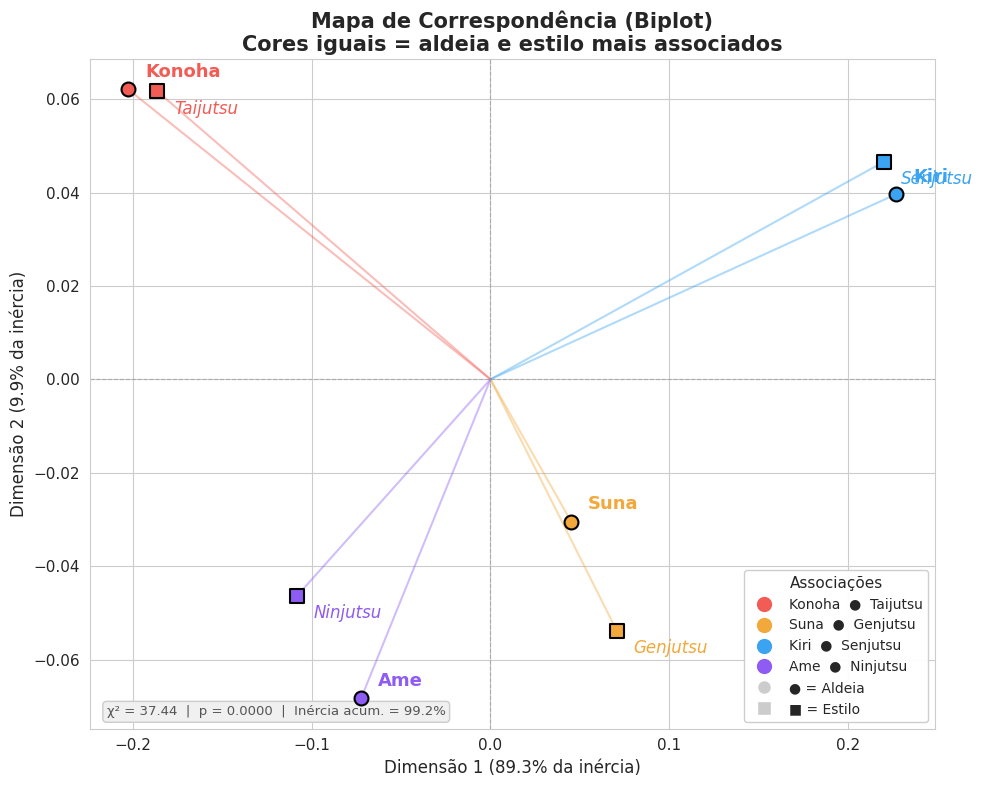

In [50]:
# Associar cores: cada estilo recebe a cor da aldeia mais associada
# (maior resíduo padronizado positivo)
associacoes = {}
for aldeia in data.index:
    estilo_mais_forte = residuals.loc[aldeia].idxmax()
    associacoes[aldeia] = estilo_mais_forte

COLORS_ESTILOS = {}
for aldeia, estilo in associacoes.items():
    COLORS_ESTILOS[estilo] = COLORS_ALDEIAS[aldeia]
for estilo in data.columns:
    if estilo not in COLORS_ESTILOS:
        COLORS_ESTILOS[estilo] = '#999999'

print('Associações por resíduo mais forte:')
for aldeia, estilo in associacoes.items():
    print(f'  {aldeia} → {estilo}  (resíduo: {residuals.loc[aldeia, estilo]:.2f})')

# ============================================================
fig, ax = plt.subplots(figsize=(10, 8))

# Linhas de referência
ax.axhline(0, color='#aaaaaa', linewidth=0.8, linestyle='--')
ax.axvline(0, color='#aaaaaa', linewidth=0.8, linestyle='--')

# Linhas conectando ao centro
for i in range(len(data.index)):
    ax.plot([0, row_coords[i, 0]], [0, row_coords[i, 1]],
            color=COLORS_ALDEIAS[data.index[i]], linewidth=1.5, alpha=0.4)
for i in range(len(data.columns)):
    ax.plot([0, col_coords[i, 0]], [0, col_coords[i, 1]],
            color=COLORS_ESTILOS[data.columns[i]], linewidth=1.5, alpha=0.4)

# Aldeias (círculos)
for i, aldeia in enumerate(data.index):
    ax.scatter(row_coords[i, 0], row_coords[i, 1],
               s=100, c=COLORS_ALDEIAS[aldeia], edgecolors='black',
               linewidths=1.5, zorder=5)
    ax.annotate(aldeia, (row_coords[i, 0], row_coords[i, 1]),
                textcoords='offset points', xytext=(12, 9),
                fontsize=13, fontweight='bold', color=COLORS_ALDEIAS[aldeia])

# Estilos (quadrados)
for i, estilo in enumerate(data.columns):
    ax.scatter(col_coords[i, 0], col_coords[i, 1],
               s=100, c=COLORS_ESTILOS[estilo], edgecolors='black',
               linewidths=1.5, marker='s', zorder=5)
    ax.annotate(estilo, (col_coords[i, 0], col_coords[i, 1]),
                textcoords='offset points', xytext=(12, -16),
                fontsize=12, fontstyle='italic', color=COLORS_ESTILOS[estilo])

# Legenda das associações
legend_handles = []
for aldeia, estilo in associacoes.items():
    legend_handles.append(
        plt.Line2D([0], [0], marker='o', color='w',
                   markerfacecolor=COLORS_ALDEIAS[aldeia], markersize=12,
                   label=f'{aldeia}  ●  {estilo}', linestyle='None')
    )
legend_handles.append(
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#cccccc',
               markersize=10, label='● = Aldeia', linestyle='None')
)
legend_handles.append(
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='#cccccc',
               markersize=10, label='■ = Estilo', linestyle='None')
)
ax.legend(handles=legend_handles, loc='lower right', fontsize=10,
          framealpha=0.95, title='Associações', title_fontsize=11)

ax.set_title('Mapa de Correspondência (Biplot)\nCores iguais = aldeia e estilo mais associados')
ax.set_xlabel(f'Dimensão 1 ({explained_var[0]:.1f}% da inércia)')
ax.set_ylabel(f'Dimensão 2 ({explained_var[1]:.1f}% da inércia)')

ax.text(0.02, 0.02,
        f'χ² = {chi2:.2f}  |  p = {p_value:.4f}  |  Inércia acum. = {explained_var[0]+explained_var[1]:.1f}%',
        transform=ax.transAxes, fontsize=9.5, color='#555555',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='#f0f0f0', edgecolor='#cccccc'))

plt.tight_layout()
plt.show()

---
## 📝 Passo 9 — Interpretação Final

Com base nos resultados:

- **Konoha** fica próximo de **Taijutsu** → faz sentido! Rock Lee e Guy-Sensei são de Konoha.
- **Kiri** fica próximo de **Senjutsu** → os shinobis de Kiri são mais voltados para técnicas avançadas.
- **Ame** fica próximo de **Ninjutsu** → a aldeia da chuva destaca no uso de ninjutsu.
- **Suna** fica mais central, com perfil mais equilibrado entre os estilos.

A inércia acumulada nas duas dimensões nos diz qua fração da variabilidade total foi capturada no gráfico. Quanto maior, melhor a representação visual dos dados.

### Dica bônus: Prince - Otimizando o tempo

In [51]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 4.7 MB/s eta 0:00:00


In [52]:
import prince

In [54]:
data = pd.DataFrame({
    'Taijutsu':  [30, 15, 10, 20],
    'Ninjutsu':  [25, 20, 15, 30],
    'Genjutsu':  [15, 25, 25, 25],
    'Senjutsu':  [10, 20, 35, 15]
}, index=['Konoha', 'Suna', 'Kiri', 'Ame'])

ca = prince.CA(n_components=2)
ca = ca.fit(data)

ca.plot(data)

alt.LayerChart(...)